# Problem Definition

Description
The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.
Key attributes of the database
The database includes the following indicators:
•	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
•	`country_long` (text): longer form of the country designation
•	`name` (text): name or title of the power plant, generally in Romanized form
•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant
•	`capacity_mw` (number): electrical generating capacity in megawatts
•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
•	`primary_fuel` (text): energy source used in primary electricity generation or export
•	`other_fuel1` (text): energy source used in electricity generation or export
•	`other_fuel2` (text): energy source used in electricity generation or export
•	`other_fuel3` (text): energy source used in electricity generation or export
•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
•	`owner` (text): majority shareholder of the power plant, generally in Romanized form
•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
•	`url` (text): web document corresponding to the `source` field
•	`geolocation_source` (text): attribution for geolocation information
•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
•	`year_of_capacity_data` (number): year the capacity information was reported
•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
•	`generation_data_source` (text): attribution for the reported generation information
•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 
Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 
Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [2]:
#import libraries

from plotly import __version__
from plotly.offline import download_plotlyjs,init_notebook_mode,plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.offline as py
import plotly.graph_objs as go
init_notebook_mode(connected = True)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.svm import SVR

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Data Analysis   (EDA)

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")


In [4]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(907, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [7]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [8]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

As we can see from above there are many null values in dataset

Remove some columns those having maximum no of null values

In [9]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       907
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_gwh_2019       907
generation_data_source    458
dtype: int64

In [11]:
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [12]:
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2013      907
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
generation_gwh_2019      907
dtype: int64

In [13]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019
count,907.000000,861.000000,861.000000,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
std,590.085456,6.239612,4.939316,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN
min,0.000000,8.168900,68.644700,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN


In [14]:
df['year_of_capacity_data'].nunique()

1

In [15]:
df['name'].nunique()

907

### Drop name column 

In [16]:
df.drop(['name','url'],axis=1,inplace=True)

In [17]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [18]:
# filling geolocation_source with mode because category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [19]:
# removing 'year_of_capacity_data' column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [20]:
# filling null values with median in numerical columns
df.fillna(df.median()[0], inplace=True)

In [21]:
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2013    0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2019    0
dtype: int64

In [22]:
df['source'].nunique()

191

In [23]:
df['geolocation_source'].nunique()

3

In [24]:
df['country'].nunique()

1

In [25]:
df['country_long'].nunique()

1

### We can aslo drop country and country_name as there is only one country INDIA

In [26]:
df.drop(['country','country_long'],axis=1,inplace=True)

### Droping generation_gwh_2019,generation_gwh_2013 column because it has all null values

In [27]:
df.drop(['generation_gwh_2019','generation_gwh_2013'],axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

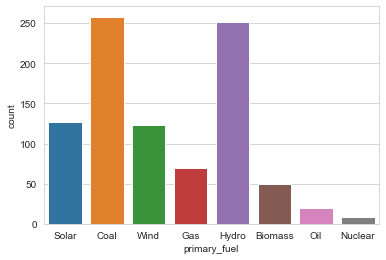

In [29]:
sns.set_style("whitegrid")
sns.countplot(x="primary_fuel", data=df)

In [30]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.200000,59.200,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.200000,59.200,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.200000,59.200,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [31]:
df.shape

(907, 12)

In [32]:
dfcorr=df.corr()

<AxesSubplot:>

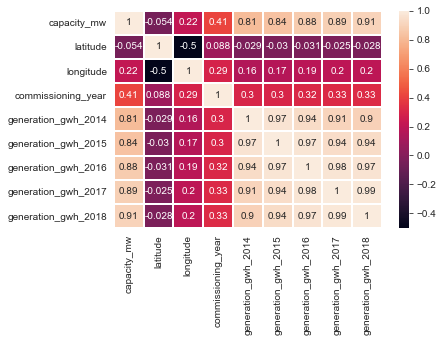

In [33]:
sns.heatmap(dfcorr,annot=True, linewidth=1)

we can notice generation_gwh_2014,....2015,...2016 ,...2017...,2018...,2019 are positively correlated to capacity_mw and latitude is negative correlated

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2014'>

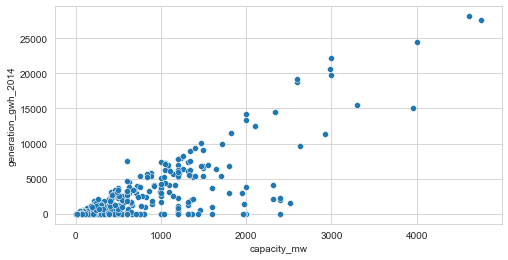

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2014

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2015'>

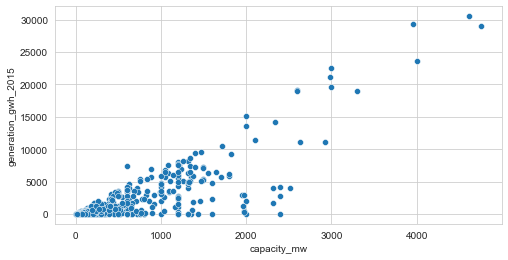

In [35]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2015

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2016'>

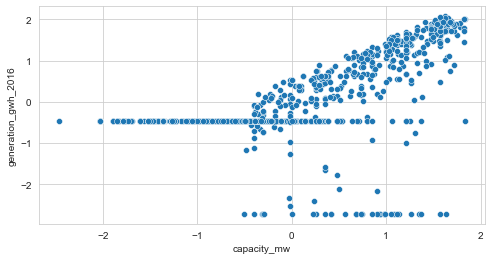

In [129]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2016',data=df)

electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2016

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2017'>

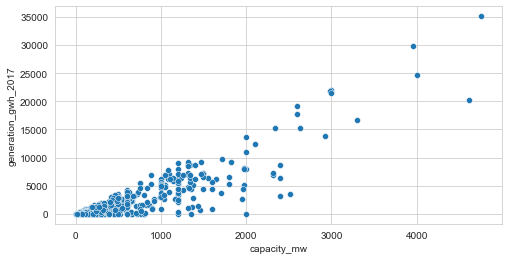

In [38]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2017

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2018'>

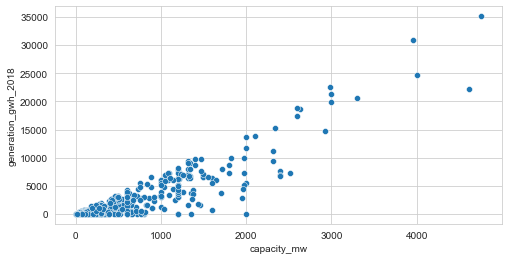

In [39]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

electricity generation in gigawatt-hour increasing also increasing the no of electrical generating capacity in megawatts in 2018

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

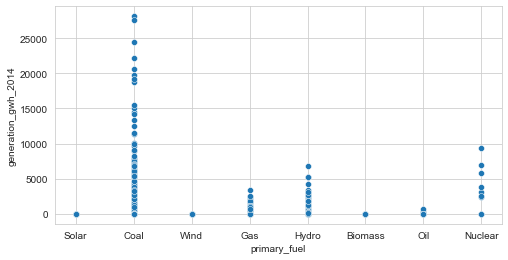

In [40]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

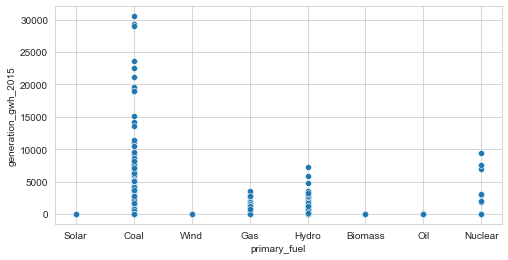

In [41]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

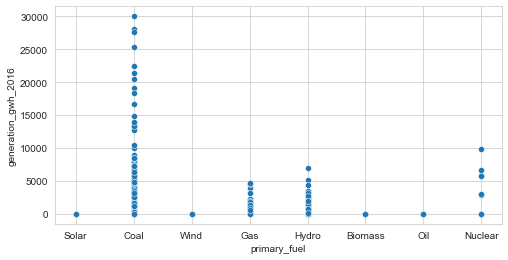

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

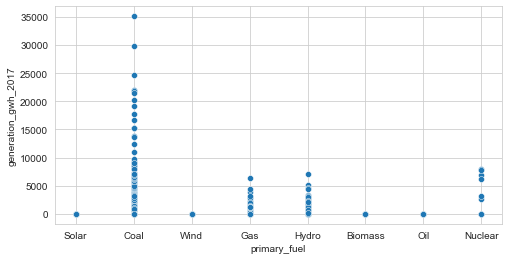

In [43]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

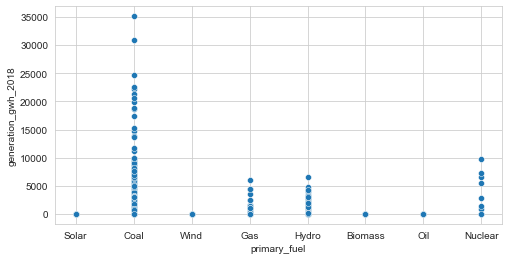

In [44]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

In all of the year 2014 to 2018 the coal is most used fuel in 2013 and Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

<AxesSubplot:xlabel='primary_fuel', ylabel='latitude'>

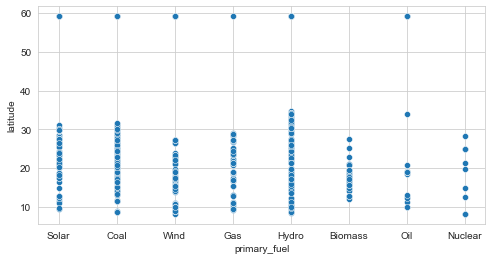

In [45]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='primary_fuel',y='latitude',data=df)

<AxesSubplot:xlabel='capacity_mw', ylabel='primary_fuel'>

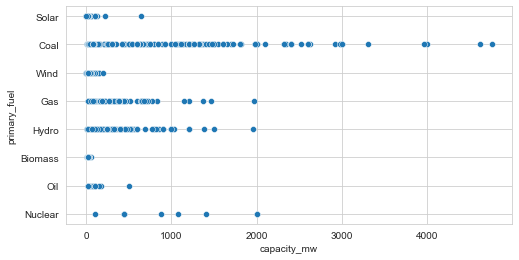

In [46]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='primary_fuel',data=df)

Coal is on max electrical generating capacity in megawatts

# Pre-Processing Pipeline

### USE LABEL ENCODER 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [48]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [49]:
df['geolocation_source'].unique()


array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [50]:
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [51]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


All columns are converted into NUMERICAL now

### OUTLIERS REMOVAL

In [53]:
z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','capacity_mw']]))
print(np.where(z>3))

(array([ 15,  15,  15,  15, 143, 143, 143, 143, 143, 147, 158, 209, 209,
       209, 209, 209, 308, 308, 308, 308, 308, 363, 364, 364, 364, 364,
       364, 375, 482, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       532, 623, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695,
       695, 695, 695, 695, 721, 721, 721, 721, 724, 724, 724, 724, 726,
       726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 788, 808, 808,
       808, 808, 808, 880, 880, 880, 880, 880], dtype=int64), array([1, 2, 3, 4, 0, 1, 2, 3, 4, 4, 0, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 4,
       0, 1, 2, 3, 4, 4, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 0, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,
       2, 3, 4, 4, 0, 1, 2, 3, 4, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4],
      dtype=int64))


In [54]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (882, 12)
Percentage of data loss post outlier removal:  2.7563395810363835


### SKEWNESS HANDLING

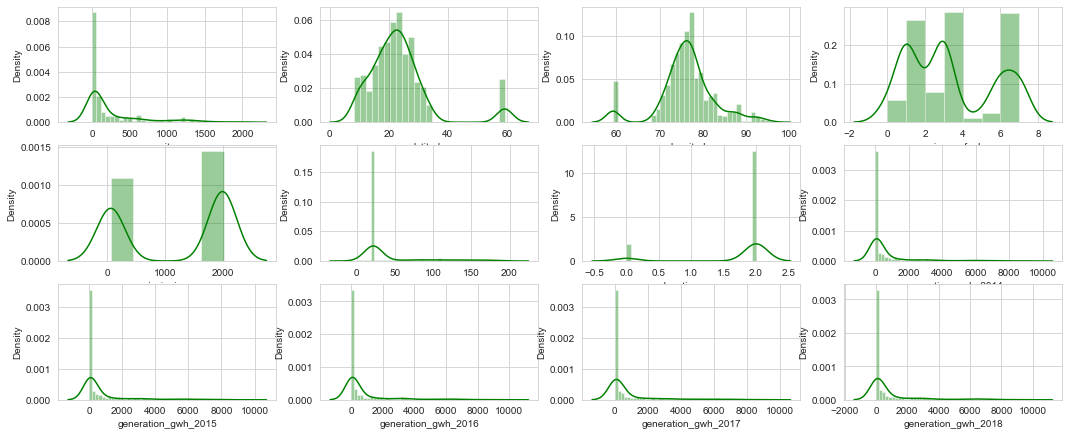

In [55]:
plt.figure(figsize=(18,20))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='g')

In [56]:
df.skew()

capacity_mw            2.054665
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014    2.885639
generation_gwh_2015    2.711018
generation_gwh_2016    2.651120
generation_gwh_2017    2.563221
generation_gwh_2018    2.615528
dtype: float64

In [57]:
df.shape

(882, 12)

If
skewness more than
+/- 0.5 
it will we treated

In [130]:
df[['capacity_mw',"generation_gwh_2013",'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]=power_transform(df[['capacity_mw','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']])

In [131]:
df.skew()

capacity_mw           -0.024999
latitude               1.914796
longitude             -0.275375
primary_fuel           0.428186
commissioning_year    -0.279248
source                 1.782583
geolocation_source    -2.112610
generation_gwh_2014   -0.255119
generation_gwh_2015   -0.235290
generation_gwh_2016   -0.215124
generation_gwh_2017   -0.001061
generation_gwh_2018    2.615528
generation_gwh_2013   -0.265720
dtype: float64

In [132]:
pd.DataFrame(df).isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
generation_gwh_2013    0
dtype: int64

# EDA Concluding Remarks

While performing the EDA  we came to notice that generation_gwh_2013 and generation_gwh_2019 columns have all null values so
it has negative impact on our data so we have to remove it.

Also there was skewness present in our data and its cause was OUTLIERS. So we have to work on that also. 

Also we have corrected the data so no single column contains null values.

# Building Machine Learning Models


### First taking 'capacity_mw' as TARGET and will use REGRESSION MODEL

In [61]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [62]:
x.shape


(882, 12)

In [63]:
y.shape


(882,)

In [64]:
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [65]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [66]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.293848,0.475981,0.466958,0.562984,0.234037,0.862812,0.571681,0.569223,0.567041,0.551176,0.091333,0.568775
std,0.204767,0.173376,0.325982,0.490143,0.237462,0.342589,0.198850,0.201550,0.209030,0.214026,0.184717,0.196297
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.172280,0.401798,0.142857,0.000000,0.115789,1.000000,0.480732,0.473836,0.467732,0.449059,0.006004,0.479779
50%,0.274085,0.475058,0.428571,0.978048,0.115789,1.000000,0.480732,0.473836,0.467732,0.449059,0.006004,0.479779
75%,0.365181,0.549905,0.857143,0.991832,0.188158,1.000000,0.705298,0.696480,0.706463,0.696289,0.059481,0.696765
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regression

In [67]:
LR = LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The training accuracy is: {r2_score(y_train,LR_predict_train)}')
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The training accuracy is: 0.6456074067183621
At random state 0, The test accuracy is: 0.6424993769797607


At random state 1, The training accuracy is: 0.6558330105491323
At random state 1, The test accuracy is: 0.6023032055208438


At random state 2, The training accuracy is: 0.6500526421926607
At random state 2, The test accuracy is: 0.610396437676322


At random state 3, The training accuracy is: 0.6520989366612009
At random state 3, The test accuracy is: 0.6225044402587006


At random state 4, The training accuracy is: 0.6410247086660916
At random state 4, The test accuracy is: 0.6663217647791053


At random state 5, The training accuracy is: 0.647820427531018
At random state 5, The test accuracy is: 0.639639653743897


At random state 6, The training accuracy is: 0.632872148273659
At random state 6, The test accuracy is: 0.6878082730118371


At random state 7, The training accuracy is: 0.6520479641750839
At random state 7, The test accuracy is: 0.609135101243663

At random state 93, The training accuracy is: 0.66249305157575
At random state 93, The test accuracy is: 0.5747141340425541


At random state 94, The training accuracy is: 0.6692061081377336
At random state 94, The test accuracy is: 0.5580536259679592


At random state 95, The training accuracy is: 0.6432512127852212
At random state 95, The test accuracy is: 0.6361959660156826


At random state 96, The training accuracy is: 0.642789826238866
At random state 96, The test accuracy is: 0.6608868942447687


At random state 97, The training accuracy is: 0.6629385969353249
At random state 97, The test accuracy is: 0.565450411754808


At random state 98, The training accuracy is: 0.6590453776910234
At random state 98, The test accuracy is: 0.5667765702262166


At random state 99, The training accuracy is: 0.660176338926262
At random state 99, The test accuracy is: 0.5974102337503664




In [68]:
#splitting the data into 73% training and 27% testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=95)

In [69]:
x_train.shape


(643, 12)

In [70]:
x_test.shape


(239, 12)

In [71]:
y_train.shape


(643,)

In [72]:
y_test.shape


(239,)

In [73]:
LR=LinearRegression()
LR.fit(x_train,y_train)
print(LR.score(x_train,y_train))
LR_predict=LR.predict(x_test)

0.6393909553623137


In [74]:
print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print('r2_score:',r2_score(LR_predict,y_test))

MSE: 0.363843109349317
MAE: 0.47500211813717697
r2_score: 0.4073024048269184


### Ridge

In [75]:
R=Ridge()
R.fit(x_train,y_train)
print(R.score(x_train,y_train))
R_predict=R.predict(x_test)

0.63888011532008


In [76]:
print('MSE:',mean_squared_error(R_predict,y_test))
print('MAE:',mean_absolute_error(R_predict,y_test))
print('r2_score:',r2_score(R_predict,y_test))

MSE: 0.3656330503603838
MAE: 0.47487567277779
r2_score: 0.39384535451086766


### SVR

### SVR(kernel='linear')

In [77]:
svr=SVR(kernel='linear')
svr.fit(x_train,y_train)
print(svr.score(x_train,y_train))
svr_predict=svr.predict(x_test)

0.6226976162193357


In [78]:
print('MSE:',mean_squared_error(svr_predict,y_test))
print('MAE:',mean_absolute_error(svr_predict,y_test))
print('r2_score:',r2_score(svr_predict,y_test))

MSE: 0.38233840153540716
MAE: 0.4640816870681263
r2_score: 0.4039012010311953


### SVR(kernel='poly')

In [79]:
svr_p=SVR(kernel='poly')
svr_p.fit(x_train,y_train)
print(svr_p.score(x_train,y_train))
svrpred_p=svr_p.predict(x_test)

0.7897726990117241


In [80]:
print('MSE:',mean_squared_error(svrpred_p,y_test))
print('MAE:',mean_absolute_error(svrpred_p,y_test))
print('r2_score:',r2_score(svrpred_p,y_test))

MSE: 0.22528525682828335
MAE: 0.34564942386112735
r2_score: 0.6835221005221925


### SVR(Kernel='rbf')

In [81]:
svr_r=SVR(kernel='rbf')
svr_r.fit(x_train,y_train)
print(svr_r.score(x_train,y_train))
svrpred_r=svr_r.predict(x_test)

0.779653526224484


In [82]:
print('MSE:',mean_squared_error(svrpred_r,y_test))
print('MAE:',mean_absolute_error(svrpred_r,y_test))
print('r2_score:',r2_score(svrpred_r,y_test))

MSE: 0.2105105024755192
MAE: 0.3360785174882639
r2_score: 0.6934719316878207


### RandomForestRegressor

In [83]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_PRED=RF.predict(x_test)

0.9614486125266618


In [84]:
print('MSE:',mean_squared_error(RF_PRED,y_test))
print('MAE:',mean_absolute_error(RF_PRED,y_test))
print('r2_score:',r2_score(RF_PRED,y_test))

MSE: 0.16740578423885086
MAE: 0.2939909097798766
r2_score: 0.790614322765386


### DecisionTreeRegressor

In [85]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
print(DTR.score(x_train,y_train))
DTR_PRED=DTR.predict(x_test)

0.9931630653357881


In [86]:
print('MSE:',mean_squared_error(DTR_PRED,y_test))
print('MAE:',mean_absolute_error(DTR_PRED,y_test))
print('r2_score:',r2_score(DTR_PRED,y_test))

MSE: 0.30901231722696076
MAE: 0.3869316416220897
r2_score: 0.6811336571909767


### GradientBoostingRegressor

In [87]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
print(GBR.score(x_train,y_train))
GBR_PRED=GBR.predict(x_test)

0.8874014663702411


In [88]:
print('MSE:',mean_squared_error(GBR_PRED,y_test))
print('MAE:',mean_absolute_error(GBR_PRED,y_test))
print('r2_score:',r2_score(GBR_PRED,y_test))

MSE: 0.17552248668906426
MAE: 0.3069058339322651
r2_score: 0.767433209584716


### Cross validation


In [133]:
np.random.seed(10)
def rmse_cv(model, x,y):
    rmse =- (cross_val_score(model, x,y, scoring='neg_mean_squared_error', cv=10))
    return(rmse)


models = [LinearRegression(),
             Ridge(),
             SVR(kernel='linear'),
             SVR(kernel='poly'),
             SVR(kernel='rbf'),
             RandomForestRegressor(),
             DecisionTreeRegressor(),  
             GradientBoostingRegressor(),]
            


names = ['LR','R','svr','svr_p','svr_r','RF','DTR','GBR']

for model,name in zip(models,names):
    score = rmse_cv(model,x,y)
    print("{}    : {:.6f}, {:4f}".format(name,score.mean(),score.std()))

LR    : 2.522923, 0.353434
R    : 2.522679, 0.353234
svr    : 3.924082, 1.426585
svr_p    : 4.711968, 1.613450
svr_r    : 4.810222, 1.694986
RF    : 0.431856, 0.180424
DTR    : 0.776570, 0.145929
GBR    : 0.473093, 0.167254


### HYPER PARAMETER TUNING:


### GridSearchCV


### With GradientBoostingRegressor


In [90]:
GF=GradientBoostingRegressor()
param={
     'criterion':['mse','mae'],
     'n_estimators':[100, 200],
    }

In [91]:
GF_grid=GridSearchCV(RandomForestRegressor(),param,cv=10,scoring='accuracy',n_jobs=-1,verbose=2)

In [92]:
GF_grid.fit(x_train,y_train)
GF_grid_pred=GF_grid.best_estimator_.predict(x_test)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


In [93]:
GF_grid.best_params_

{'criterion': 'mse', 'n_estimators': 100}

In [94]:
print('MSE:',mean_squared_error(GF_grid_pred,y_test))
print('MAE:',mean_absolute_error(GF_grid_pred,y_test))
print('r2_score:',r2_score(GF_grid_pred,y_test))

MSE: 0.17069173842482346
MAE: 0.29450321171797955
r2_score: 0.7864044226660867


<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

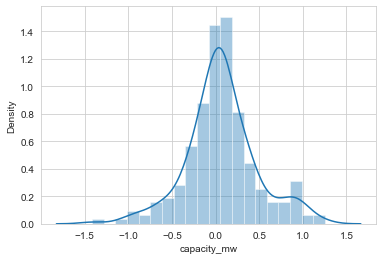

In [95]:
sns.distplot(GF_grid_pred-y_test)

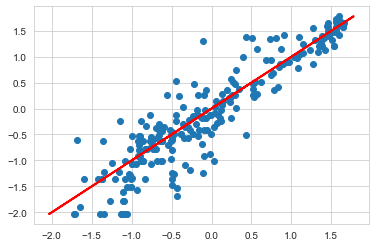

In [96]:
plt.scatter(GF_grid_pred,y_test)
plt.plot(y_test,y_test,linewidth=2,color='Red')

### TAKING 'primary_fuel' AS TARGET 

In [97]:
x=df.drop(['primary_fuel'],axis=1)
y=df['primary_fuel']

In [98]:
x.shape

(882, 12)

In [99]:
y.shape

(882,)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.27,random_state=42)

In [101]:
x_train.shape

(643, 12)

In [102]:
x_test.shape

(239, 12)

In [103]:
y_train.shape

(643,)

In [104]:
y_test.shape

(239,)

### LogisticRegression 

In [105]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x,y,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6361068310220853


In [106]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.6401673640167364
[[ 0  0  0  0  0  0  8  2]
 [ 0 38  0 16  0  0 15  6]
 [ 0  4  0 12  0  0  1  1]
 [ 0  7  0 60  0  0  0  0]
 [ 0  0  0  2  0  0  1  0]
 [ 0  0  0  2  0  0  2  0]
 [ 0  0  0  0  0  0 26  7]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.78      0.51      0.61        75
           2       0.00      0.00      0.00        18
           3       0.65      0.90      0.75        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.49      0.79      0.60        33
           7       0.64      1.00      0.78        29

    accuracy                           0.64       239
   macro avg       0.32      0.40      0.34       239
weighted avg       0.57      0.64      0.58       239

Training accuracy:: 0.640746500777605
Test accuracy:: 0.6401673640167364


### DECISION TREE CLASSIFIER

In [134]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')
print("cross validation score for svm:",np.mean(dtc_score))

cross validation score for svm: 0.802715716486903


In [135]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.7531380753138075
[[ 8  2  0  0  0  0  0  0]
 [ 5 46  8  8  7  1  0  0]
 [ 0  6  3  7  0  2  0  0]
 [ 0  4  4 58  0  1  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        10
           1       0.77      0.61      0.68        75
           2       0.18      0.17      0.17        18
           3       0.79      0.87      0.83        67
           4       0.00      0.00      0.00         3
           5       0.43      0.75      0.55         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.75       239
   macro avg       0.60      0.65      0.62       239
weighted avg       0.77      0.75      0.76       239

Training accuracy:: 1.0
Test accuracy:: 0.7531380753138075


### KNEIGHBOR CLASSIFIER

In [109]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x,y,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.6949601951720596


In [110]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6694560669456067
[[ 4  4  0  0  0  0  1  1]
 [ 7 50  1  8  0  2  4  3]
 [ 1  8  3  5  0  0  0  1]
 [ 0 14  1 52  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  1  0  0  1  1  0]
 [ 3  8  0  0  0  0 21  1]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.27      0.40      0.32        10
           1       0.57      0.67      0.62        75
           2       0.50      0.17      0.25        18
           3       0.79      0.78      0.78        67
           4       0.00      0.00      0.00         3
           5       0.33      0.25      0.29         4
           6       0.78      0.64      0.70        33
           7       0.83      1.00      0.91        29

    accuracy                           0.67       239
   macro avg       0.51      0.49      0.48       239
weighted avg       0.66      0.67      0.66       239

Training accuracy:: 0.776049766718507
Test accuracy:: 0.6694560669456067


### RANDOM FOREST CLASSIFIER

In [111]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x,y,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8424242424242424


In [112]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.8451882845188284
[[ 8  1  0  0  0  0  0  1]
 [ 4 62  3  4  0  1  0  1]
 [ 0  9  6  2  0  1  0  0]
 [ 0  6  0 61  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.77      0.83      0.79        75
           2       0.60      0.33      0.43        18
           3       0.91      0.91      0.91        67
           4       0.00      0.00      0.00         3
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        33
           7       0.94      1.00      0.97        29

    accuracy                           0.85       239
   macro avg       0.68      0.70      0.69       239
weighted avg       0.83      0.85      0.83       239

Training accuracy:: 0.9984447900466563
Test accuracy:: 0.8451882845188284


### ENSEMBLE TECHNIQUES
### 1.ADA BOOST CLASSIFIER

In [113]:
adb=AdaBoostClassifier()
adb_score=cross_val_score(adb,x,y,cv=10,scoring='accuracy')
print("cross validation score for Ada boost:",np.mean(adb_score))

cross validation score for Ada boost: 0.5521195097037793


In [114]:
adb.fit(x_train,y_train)
predicted_adb=adb.predict(x_test)
print(accuracy_score(y_test,predicted_adb))
print(confusion_matrix(y_test,predicted_adb))
print(classification_report(y_test,predicted_adb))
print("Training accuracy::",adb.score(x_train,y_train))
print("Test accuracy::",adb.score(x_test,y_test))

0.5313807531380753
[[ 0  0  0  9  0  0  0  1]
 [ 0  0  0 72  0  0  0  3]
 [ 0  0  0 18  0  0  0  0]
 [ 0  0  0 67  0  0  0  0]
 [ 0  0  0  3  0  0  0  0]
 [ 0  0  0  4  0  0  0  0]
 [ 0  0  0  2  0  0 31  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        18
           3       0.38      1.00      0.55        67
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       1.00      0.94      0.97        33
           7       0.88      1.00      0.94        29

    accuracy                           0.53       239
   macro avg       0.28      0.37      0.31       239
weighted avg       0.35      0.53      0.40       239

Training accuracy:: 0.5754276827371695
Test accuracy:: 0.5313807531380753


### 2.BAGGING CLASSIFIER

In [115]:
bgc=BaggingClassifier()
bgc_score=cross_val_score(bgc,x,y,cv=10,scoring='accuracy')
print("cross validation score for BAGGING Classifier:",np.mean(bgc_score))

cross validation score for BAGGING Classifier: 0.8401046986721145


In [116]:
bgc.fit(x_train,y_train)
predicted_bgc=bgc.predict(x_test)
print(accuracy_score(y_test,predicted_bgc))
print(confusion_matrix(y_test,predicted_bgc))
print(classification_report(y_test,predicted_bgc))
print("Training accuracy::",bgc.score(x_train,y_train))
print("Test accuracy::",bgc.score(x_test,y_test))

0.8200836820083682
[[ 8  2  0  0  0  0  0  0]
 [ 6 56  4  8  0  1  0  0]
 [ 0  8  6  3  0  1  0  0]
 [ 0  5  1 61  0  0  0  0]
 [ 0  2  1  0  0  0  0  0]
 [ 0  0  1  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.57      0.80      0.67        10
           1       0.77      0.75      0.76        75
           2       0.46      0.33      0.39        18
           3       0.85      0.91      0.88        67
           4       0.00      0.00      0.00         3
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.82       239
   macro avg       0.66      0.69      0.67       239
weighted avg       0.81      0.82      0.81       239

Training accuracy:: 0.9875583203732504
Test accuracy:: 0.8200836820083682


### 3.GRADIENT BOOSTING CLASSFIER

In [117]:
grbc=GradientBoostingClassifier()
grbc_score=cross_val_score(grbc,x,y,cv=10,scoring='accuracy')
print("cross validation score for Gradient Boosting Classifier:",np.mean(grbc_score))

cross validation score for Gradient Boosting Classifier: 0.8594611848825332


In [118]:
grbc.fit(x_train,y_train)
predicted_grbc=grbc.predict(x_test)
print(accuracy_score(y_test,predicted_grbc))
print(confusion_matrix(y_test,predicted_grbc))
print(classification_report(y_test,predicted_grbc))
print("Training accuracy::",grbc.score(x_train,y_train))
print("Test accuracy::",grbc.score(x_test,y_test))

0.8619246861924686
[[ 7  3  0  0  0  0  0  0]
 [ 5 61  1  6  1  1  0  0]
 [ 0  6 10  2  0  0  0  0]
 [ 0  5  0 62  0  0  0  0]
 [ 0  1  0  1  1  0  0  0]
 [ 0  1  0  0  0  3  0  0]
 [ 0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0 29]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.79      0.81      0.80        75
           2       0.91      0.56      0.69        18
           3       0.87      0.93      0.90        67
           4       0.50      0.33      0.40         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        29

    accuracy                           0.86       239
   macro avg       0.80      0.76      0.77       239
weighted avg       0.86      0.86      0.86       239

Training accuracy:: 1.0
Test accuracy:: 0.8619246861924686


### HYPER PARAMETER TUNING:

In [119]:
rfc=RandomForestClassifier()
param_grid={
    'criterion' : ["gini", "entropy"],
    'n_estimators':[200,50],
    'min_samples_split':[2,3],
     'random_state':[10]              
}

In [120]:
rfc_grid=GridSearchCV(RandomForestClassifier(),param_grid,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [121]:
rfc_grid.fit(x_train,y_train)
rfc_pred=rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,rfc_pred))

Fitting 4 folds for each of 8 candidates, totalling 32 fits
Accuracy after parameter tuning:: 0.8410041841004184


In [122]:
rfc_grid.best_params_

{'criterion': 'gini',
 'min_samples_split': 2,
 'n_estimators': 50,
 'random_state': 10}

### Model training with best parameters

In [123]:
best_param={
    'criterion' : ['gini'],
    'n_estimators':[200],
    'min_samples_split':[2],
     'random_state':[10]    }

In [124]:
best_rfc_grid=GridSearchCV(RandomForestClassifier(),best_param,cv=4,scoring='accuracy',n_jobs=-1,verbose=2)

In [125]:
best_rfc_grid.fit(x_train,y_train)
best_rfc_pred=best_rfc_grid.best_estimator_.predict(x_test)
print("Accuracy after parameter tuning::",accuracy_score(y_test,best_rfc_pred))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
Accuracy after parameter tuning:: 0.8619246861924686


### Report of Random Forest Classifier 

In [126]:
print("CLASSIFICATION REPORT::\n",classification_report(y_test,best_rfc_pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.80      0.87      0.83        75
           2       0.86      0.33      0.48        18
           3       0.88      0.94      0.91        67
           4       0.00      0.00      0.00         3
           5       0.60      0.75      0.67         4
           6       1.00      1.00      1.00        33
           7       0.94      1.00      0.97        29

    accuracy                           0.86       239
   macro avg       0.72      0.70      0.69       239
weighted avg       0.85      0.86      0.85       239



<AxesSubplot:>

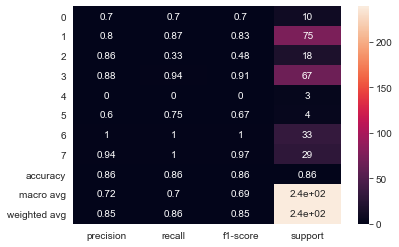

In [127]:
clsf_repo = classification_report(y_test,best_rfc_pred,output_dict=True)
sns.heatmap(pd.DataFrame(clsf_repo).T, annot=True)

In [128]:
y_prob = best_rfc_grid.fit(x_train,y_train).predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
One-vs-One ROC AUC scores:
0.939793 (macro),
0.949587 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.948771 (macro),
0.967356 (weighted by prevalence)


# Concluding Remarks

Choosing GradientBoostingRegressor as the best model when taking 'capacity_mw'as the target. accuracy is around 86%.